<a href="https://colab.research.google.com/github/nitinfaye/Artificial-Neural-Network-ANN-./blob/main/loan_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Artificial Neural Network*

*inport laibraries*

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

#Data preprocessing
importing dataset

In [3]:
data =pd.read_csv('/content/CHURN_~1.CSV')
X= data.iloc[:, 3:-1].values
y =data.iloc[:, -1].values

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


**encoding categorial data**

Lable Encoding the 'Genter'colomuns

In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X[:, 2] =le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding Geograpy coloumns

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oc = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(oc.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Splititng the dataset into the Trainig set and Iest set

Featuring Scalling

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

training ANN module

In [13]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compilling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7749
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7969
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7991
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8005
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8045
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8070
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8114
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8124
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8146
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4136 - accura

Train: 0.864, Test: 0.864


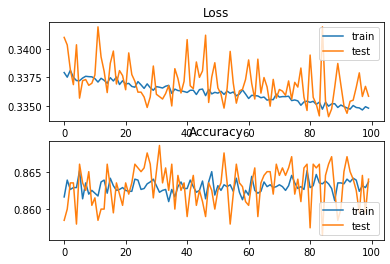

In [19]:
from matplotlib import pyplot
history =ann.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = ann.evaluate(X_train, y_train, verbose=0)
_, test_acc = ann.evaluate(X_test,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

*Homework*

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

**solution**

In [20]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,500000]]))>0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!
Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.
Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns

precdict the test result

In [21]:
y_pred =ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[1515   80]
 [ 192  213]]


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.864000
Precision: 0.726962
Recall: 0.525926
F1 score: 0.610315
